# **ADIDAS VS NIKE CLUSTERING** 

**Nama Anggota Kelompok :**


1. Risma Faoziya - 24060119120001
2. Doma Zaneta - 24060119140069
3. Gregorius Willy Adiguno - 24060119130076
4. Sekar Wangi Kusumastomo - 24060119120020
5. Agry Apri Astuti - 24060119120009

Adidas dan Nike adalah dua brand industri besar dalam bidang olahraga. Kedua brand ini memliki keunggulan masing-masing. Perbandingan data keduanya dirangkum pada sebuah dataset. Dataset inilah yang nantinya akan digunakan untuk melakukan clustering antara kedua data brand ternama ini. Dataset ini terdiri dari 3268 produk dari Nike dan Adidas dengan 12 fitur informasi termasuk peringkat, diskon, harga jual, harga yang tercantum, deskripsi produk, dan jumlah ulasan. Untuk melihat kemiripan antar dua data ini maka dilakukan clustering pada dataset ini.





Clustering adalah sebuah proses untuk mengelompokan data ke dalam beberapa cluster atau kelompok sehingga data dalam satu cluster memiliki tingkat kemiripan yang maksimum dan data antar cluster memiliki kemiripan yang minimum.Hasil clustering yang baik akan menghasilkan tingkat kesamaan yang tinggi dalam satu kelas dan tingkat kesamaan yang rendah antar kelas. Kesamaan yang dimaksud merupakan pengukuran secara numeric terhadap dua buah objek. Nilai kesamaan antar kedua objek akan semakin tinggi jika kedua objek yang dibandingkan memiliki kemiripan yang tinggi. Begitu juga dengan sebaliknya. Clustering Adidas Vs Nike memisahkan objek ke dalam kelompok-kelompok yang mencerminkan kesamaan di antara Adidas Vs Nike di setiap cluster.


### TABLE OF CONTENTS
    
* [1. IMPORTING LIBRARIES](#1)
    
* [2. DATA UNDERSTANDING](#2)
    
* [3. DATA CLEANING AND PREPROCESSING](#3)
    
* [4. EXPLORATORY DATA AND STATISTICAL ANALYSIS](#4)   

* [5. FEATURE SELECTION](#5)
    
* [6. DATA REDUCTION](#6)
    
* [7. ELBOW METHOD](#7)
    
* [8. KMEANS CLUSTERING](#8)

* [9. CLUSTER VISUALIZATION](#9) 

* [10. EVALUATE MODEL](#10) 


<a id ="1"></a>
### IMPORTING LIBRARIES



In [ ]:
# Data Manipulation, Linear Algebra
import numpy as np
import pandas as pd

# Plots
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics.cluster import silhouette_score

# KMeans Clustering
from sklearn.cluster import KMeans

<a id ="2"></a>
## DATA UNDERSTANDING



Secara garis besar untuk memeriksa data, sehingga dapat mengidentifikasi masalah dalam data. *Data Understanding* bertujuan untuk mendapatkan gambaran umum atas data yang digunkan atau dengan kata lain proses dalam memahami data sebelum data itu diolah.

In [ ]:
#Load Dataset
dataset = pd.read_csv('Adidas Vs Nike.csv')
dataset.head()

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Last Visited
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas Adidas ORIGINALS,Channeling the streamlined look of an '80s rac...,4.8,41,2020-04-13T15:06:14
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,"A modern take on adidas sport heritage, tailor...",3.3,24,2020-04-13T15:06:15
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,These adidas Puka slippers for women's come wi...,2.6,37,2020-04-13T15:06:15
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,"Inspired by modern tech runners, these women's...",4.1,35,2020-04-13T15:06:15
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,This design is inspired by vintage Taekwondo s...,3.5,72,2020-04-13T15:06:15


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 3268 entries, 0 to 3267

Data columns (total 10 columns):

 #   Column         Non-Null Count  Dtype  

---  ------         --------------  -----  

 0   Product Name   3268 non-null   object 

 1   Product ID     3268 non-null   object 

 2   Listing Price  3268 non-null   int64  

 3   Sale Price     3268 non-null   int64  

 4   Discount       3268 non-null   int64  

 5   Brand          3268 non-null   object 

 6   Description    3265 non-null   object 

 7   Rating         3268 non-null   float64

 8   Reviews        3268 non-null   int64  

 9   Last Visited   3268 non-null   object 

dtypes: float64(1), int64(4), object(5)

memory usage: 255.4+ KB


Pada dataset yang digunakan terlihat tidak ada data yang bernilai null.

In [ ]:
dataset.describe()

,Listing Price,Sale Price,Discount,Rating,Reviews
count,3268.000000,3268.000000,3268.000000,3268.000000,3268.000000
mean,6868.020196,6134.265606,26.875765,3.242105,40.551714
std,4724.659386,4293.247581,22.633487,1.428856,31.543491
min,0.000000,449.000000,0.000000,0.000000,0.000000
25%,4299.000000,2999.000000,0.000000,2.600000,10.000000
50%,5999.000000,4799.000000,40.000000,3.500000,37.000000
75%,8999.000000,7995.000000,50.000000,4.400000,68.000000
max,29999.000000,36500.000000,60.000000,5.000000,223.000000


In [ ]:
dataset.shape

(3268, 10)

Dari data diatas dapat dilihat bahwa dataset Adidas vs Nike memiliki 3268 instance dan 10 atribut data. 

<a id ="3"></a>
## DATA CLEANING DAN PREPROCESSING

Secara garis besar untuk memperbaiki masalah dalam data, kemudian membuat variabel derived. Melalui *data preprocessing*, memungkinkan proses mining akan berjalan dengan lebih efektif dan efisien. Karena data yang telah melalui Pra-pemrosesan data, merupakan data yang sudah melalui beberapa tahap pembersihan.

### Checking for Null Values in the Dataset

In [ ]:
print(dataset.isnull().sum())

Product Name     0

Product ID       0

Listing Price    0

Sale Price       0

Discount         0

Brand            0

Description      3

Rating           0

Reviews          0

Last Visited     0

dtype: int64


Dari data di atas dapat dilihat bahwa terdapat 3 data yang hilang pada Description. Untuk mengatasi masalah tersebut maka dilakukan penghapusan data untuk menghilangkan *missing value*

### Removing Null Values in the Dataset

In [ ]:
print('Before removing null values', dataset.shape)
dataset = dataset.dropna(axis=0)
print('After removing null values', dataset.shape)

Before removing null values (3268, 10)

After removing null values (3265, 10)


Dataset yang terdapat *missing value* akan dilakukan removing/penghapusan data sehingga dataset yang tadinya memiliki 3268 instance akan dihapus 3 data missing values sehingga dataset sekarang memiliki 3265 instance


### Checking for Duplicated Value in the Dataset

In [ ]:
dataset.duplicated().sum()

0

Diketahui dari output diatas, *Adidas Vs Nike dataset* tidak memiliki nilai duplikat, sehingga tidak perlu dilakukan proses penghapusan duplikat data.

### Remove Outliers

*Outliers* adalah titik data yang nilainya secara signifikan berbeda dengan populasi tertentu. Sehingga jika diterapkan pada model *clustering*, maka akan mempengaruhi *centroid* (pusat cluster). Dimana posisi *centroid* akan menyimpang dari semestinya, sehingga nantinya akan mempengaruhi hasil *cluster* dari model yang mengakibatkan banyak data masuk ke *cluster* yang kurang sesuai. Oleh karena itu, *outliers* ini perlu dideteksi dan dilakukan penggantian nilai atau penghapusan. Pada tahap ini, kelompok kami melakukan penghapusan *outliers*.

In [ ]:
# Melihat kolom dataset
dataset.columns

Index(['Product Name', 'Product ID', 'Listing Price', 'Sale Price', 'Discount',
       'Brand', 'Description', 'Rating', 'Reviews', 'Last Visited'],
      dtype='object')

In [ ]:
# Outlier Detection
print('Before removing outliers: ',dataset.shape)

num_columns = ['Listing Price', 'Sale Price', 'Discount','Rating', 'Reviews']

for col in num_columns:
  q1, q3 = dataset[col].quantile([0.25, 0.75])
  IQR = q3 - q1

  max_val = q3 + 1.5 * IQR
  min_val = q1 - 1.5 * IQR
  outliers = dataset[(dataset[col]>max_val) | (dataset[col]<min_val)].index
  dataset.drop(outliers,axis=0,inplace=True)
print('After removing outliers: ',dataset.shape)

Before removing outliers:  (3265, 10)

After removing outliers:  (3014, 10)


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame



See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  return super().drop(


Output menunjukkan perubahan setelah dilakukan penghapusan outliers, data berkurang dari 3265 menjadi 3014 entri data yang bersih dari outliers.

### Converting String to Date and time format

In [ ]:
# Checking dataset
sample_date = dataset['Last Visited'][0]
print("The date is in the format: " + sample_date)
print("The type for the Last Visited Attribute is: " + str(type(sample_date)))

The date is in the format: 2020-04-13T15:06:14

The type for the Last Visited Attribute is: <class 'str'>


Dikarenakan kolom waktu dan tanggal memiliki format string maka perlu dilakukan data kedalam format yang benar

In [ ]:
from datetime import datetime

# Change T to " "
dates = [date.replace("T", " ") for date in dataset['Last Visited']]
dates = [datetime.fromisoformat(date) for date in dates]
dataset['Last Visited'] = dates
print("The type for the Last Visited Attribute is: " + str(type(dates[0])))

The type for the Last Visited Attribute is: <class 'datetime.datetime'>


<ipython-input-12-738ae66b8b7e>:6: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame.

Try using .loc[row_indexer,col_indexer] = value instead



See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  dataset['Last Visited'] = dates


### Show Data After Cleansing

In [ ]:
# Deskripsi statistik Adidas vs Nike dataset
dataset.describe()

,Listing Price,Sale Price,Discount,Rating,Reviews
count,3014.000000,3014.000000,3014.000000,3014.000000,3014.000000
mean,6531.826145,5284.672528,28.360982,3.240942,41.593563
std,3867.062273,3004.634755,22.379991,1.406633,31.316978
min,0.000000,449.000000,0.000000,0.000000,0.000000
25%,4599.000000,2999.000000,0.000000,2.600000,12.000000
50%,5999.000000,4499.000000,40.000000,3.500000,39.000000
75%,7999.000000,7199.000000,50.000000,4.400000,69.000000
max,15999.000000,14495.000000,60.000000,5.000000,105.000000


Setelah data dilakukan pembersihan maka akan terlihat data yang mudah diolah seperti yang ditampilkan diatas.

### Choose Columns with Numeric Values

In [ ]:
arr_dataset = dataset.iloc[:, [2,3,4,7,8]].values
arr_dataset

array([[1.4999e+04, 7.4990e+03, 5.0000e+01, 4.8000e+00, 4.1000e+01],
       [7.5990e+03, 3.7990e+03, 5.0000e+01, 3.3000e+00, 2.4000e+01],
       [9.9900e+02, 5.9900e+02, 4.0000e+01, 2.6000e+00, 3.7000e+01],
       ...,
       [4.9950e+03, 3.4970e+03, 0.0000e+00, 0.0000e+00, 0.0000e+00],
       [8.4950e+03, 5.9470e+03, 0.0000e+00, 5.0000e+00, 1.0000e+00],
       [8.9950e+03, 6.2970e+03, 0.0000e+00, 0.0000e+00, 0.0000e+00]])

In [ ]:
arr_dataset.shape

(3014, 5)

Setelah dilakukan pembersihan dan pemilihan nilai numeric maka akan dihasilkan data dengan 3014 instance dan 5 kolom data

### Data Scaling/Transformation

*Data scaling* atau transformation data merupakan teknik mengubah nilai numerik dalam dataset ke skala umum, tanpa mendistorsi perbedaan dalam rentang nilai. *Data Scaling* adalah suatu cara untuk membuat numerical data pada dataset memiliki rentang nilai (scale) yang sama. Tidak ada lagi satu variabel data yang mendominasi variabel data lainnya.

In [ ]:
sc = StandardScaler()
scaled_dataset = dataset.copy()
scaled_dataset = scaled_dataset.iloc[:, [2,3,4,7,8]].values
scaled_dataset = sc.fit_transform(scaled_dataset)

In [ ]:
scaled_dataset.shape

(3014, 5)

In [ ]:
scaled_dataset

array([[ 2.18992565,  0.73709289,  0.9670517 ,  1.10854564, -0.01895655],
       [ 0.2760108 , -0.49454232,  0.9670517 ,  0.04199215, -0.56188317],
       [-1.43099434, -1.55974034,  0.52014986, -0.45573281, -0.14670399],
       ...,
       [-0.39748032, -0.59507039, -1.26745752, -2.30442553, -1.3283678 ],
       [ 0.50774967,  0.22047185, -1.26745752,  1.25075278, -1.29643094],
       [ 0.63706825,  0.33697788, -1.26745752, -2.30442553, -1.3283678 ]])

<a id ="4"></a>
## EXPLORATORY DATA AND STATISTICAL ANALYSIS

EDA adalah proses mencari tahu apa yang data dapat memberitahu kami dan kami menggunakan EDA untuk menemukan pola, hubungan, atau anomali untuk menginformasikan analisis kami selanjutnya. Menurut wikipedia EDA (Exploratory Data Analysis) merupakan pendekatan menganalisis data set untuk merangkum karakteristik utamanya,sering kali menggunakan grafik statistik dan metode visualisasi data lainnya.

### Simple Distribution Plots for all Features

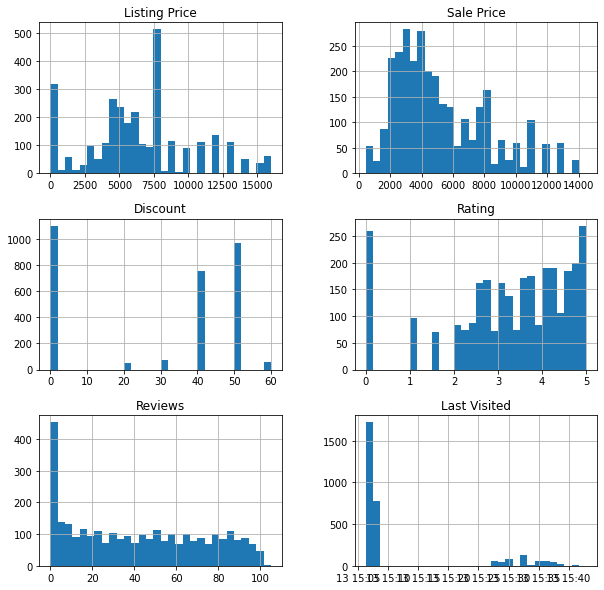

In [ ]:
plt.rcParams['figure.figsize'] = (10,10)
dataset.hist(bins=30)
plt.show()

### Pair Plot to Compare All Variables

* Pair Plot memungkinkan kita untuk melihat distribusi variabel tunggal dan hubungan antara 2 variabel. 
* Pair Plot adalah metode yang bagus untuk mengidentifikasi tren untuk analisis tindak lanjut dan untungnya mudah diimplementasikan dengan Python!
* Pair Plot adalah matriks scatterplot yang memungkinkan kita untuk memahami hubungan berpasangan antara variabel yang berbeda dalam kumpulan data.

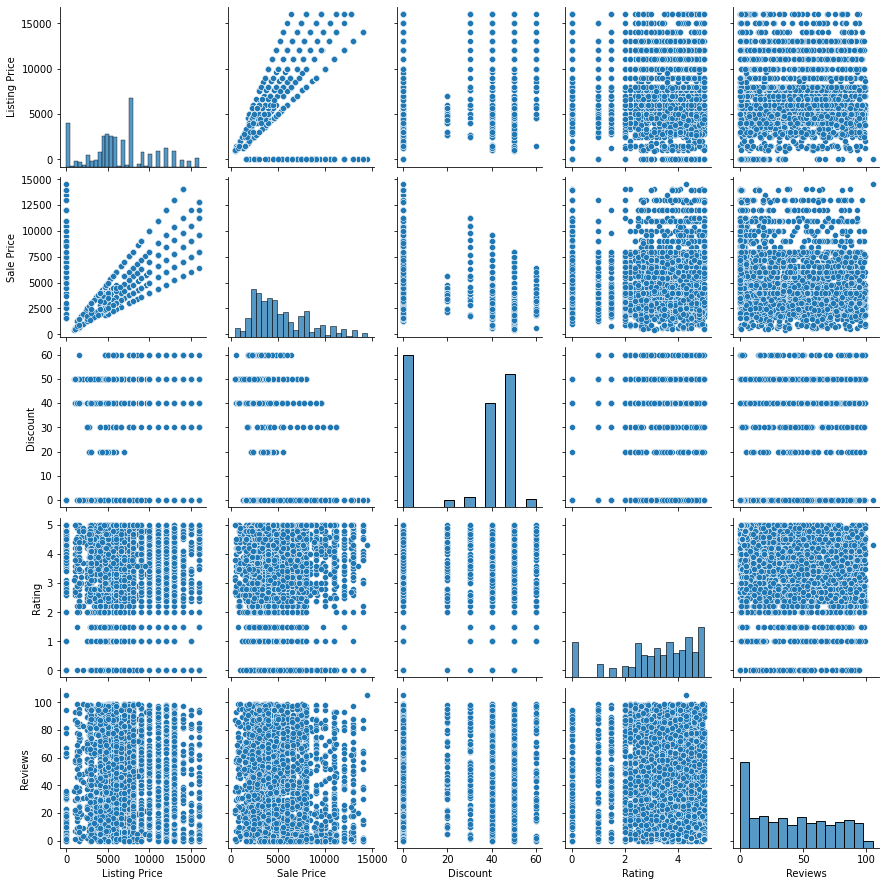

In [ ]:
sns.pairplot(dataset)
plt.show()

### Heatmap to Check for Corelation between Features

* Heatmap adalah representasi grafis dari korelasi data dimana nilai digambarkan dengan warna.
* Heatmap didefinisikan sebagai representasi grafis dari data menggunakan warna untuk memvisualisasikan nilai matriks korelasi antar data.

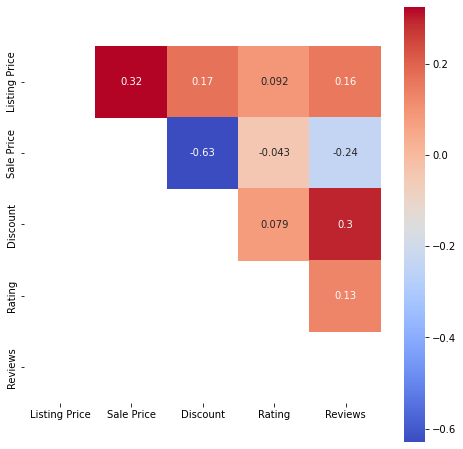

In [ ]:
plt.figure(figsize=(8, 8))
mask = np.tril(dataset.corr())
sns.heatmap(dataset.corr(), cmap='coolwarm', annot=True, fmt='.2g', square=True, mask=mask);

Dari heatmap di atas, didapat pasangan fitur dengan korelasi tertinggi yaitu Listing Price dan Sale Price.

<a id ="5"></a>
## FEATURE SELECTION

*Feature Selection* digunakan untuk mengurangi kompleksitas atribut yang akan dikelola pada processing dan analisis. Teknik ini mengurangi jumlah fitur yang terlibat dalam menentukan suatu nilai kelas target. Fitur yang diabaikan biasanya berupa fitur yang tidak relevan dan data berlebih. Tujuan utama dari seleksi fitur ialah memilih fitur terbaik dari suatu kumpulan data fitur. Berdasarkan heatmap pada langkah sebelumnya, fitur yang digunakan adalah Listing Price dan Sale Price



### Show Feature Plotting with Original Data

Text(0, 0.5, 'Sale price')

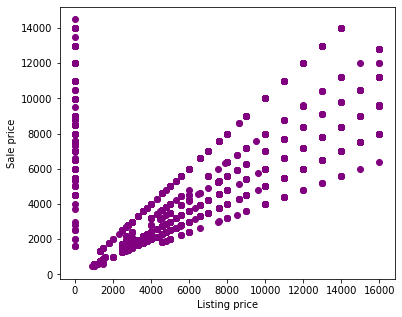

In [ ]:
feature = arr_dataset[:, [0,1]]
plt.figure(figsize=(6,5))
plt.scatter(feature[:, 0], feature[:, 1], c = 'purple')
plt.xlabel('Listing price')
plt.ylabel('Sale price')

Grafik di atas merupakan output dari feature plotting dengan menggunakan data asli. Listing price digunakan sebagai sumbu x sedangnkan sale price digunakan sebagai sumbu y. 

### Show Feature Plotting with Scaled Data

Text(0, 0.5, 'Sale price')

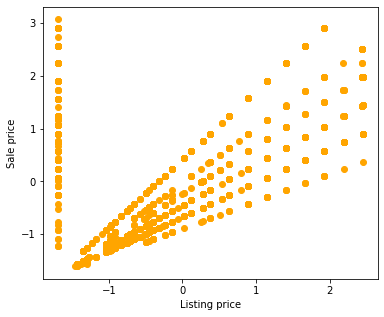

In [ ]:
feature_s = scaled_dataset[:, [0,1]]
plt.figure(figsize=(6,5))
plt.scatter(feature_s[:, 0], feature_s[:, 1], c = 'orange')
plt.xlabel('Listing price')
plt.ylabel('Sale price')

<a id ="6"></a>
## DATA REDUCTION

Data reduction digunakan untuk mengurangi dimensi pada data. Pada kasus ini, dilakukan data reduction untuk mentranformasikan data dari 5 dimensi ke 2 dimensi menggunakan PCA.

### Applying Principal Component Analysis

In [ ]:
pca = PCA(2)
pca_dataset = pca.fit_transform(scaled_dataset)

In [ ]:
pca_dataset

array([[-0.29627404,  2.43784339],
       [-0.68573933, -0.08871262],
       [-1.18458613, -1.88460741],
       ...,
       [ 1.36870223, -1.91949385],
       [ 1.30709377,  0.39953173],
       [ 1.96194334, -0.76298762]])

In [ ]:
pca_dataset.shape

(3014, 2)

###Show Feature Plotting with Reducted Data

Text(0, 0.5, 'Feature Y')

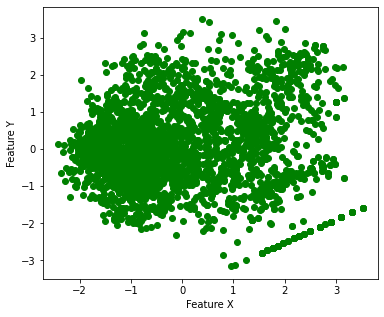

In [ ]:
feature_pca = pca_dataset[:, [0,1]]
plt.figure(figsize=(6,5))
plt.scatter(feature_pca[:, 0], feature_pca[:, 1], c = 'green')
plt.xlabel('Feature X')
plt.ylabel('Feature Y')

<a id ="7"></a>
## ELBOW METHOD

Metode Elbow merupakan suatu metode yang digunakan untuk menghasilkan informasi dalam menentukan jumlah cluster terbaik dengan cara melihat presentase hasil perbandingan anatara jumlah cluster yang akan membentuk siku pada suatu titik. 

### Elbow Method for Model with Feature Selection

k =  1  inertia :  72262237982.61943

k =  2  inertia :  37514575275.73627

k =  3  inertia :  20429198696.58136

k =  4  inertia :  12745357702.468958

k =  5  inertia :  10568021816.3775

k =  6  inertia :  8530229601.309467

k =  7  inertia :  6832830216.603264

k =  8  inertia :  5518715162.874453

k =  9  inertia :  4698518180.345342

k =  10  inertia :  4022666619.103101


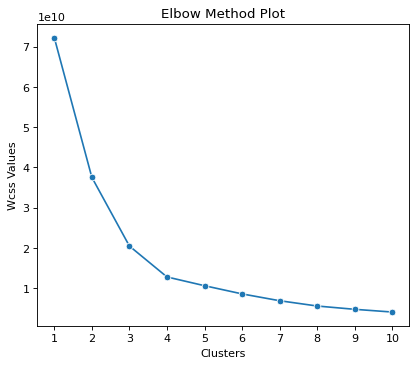

In [ ]:
wcss = []

for i in range(1,11):
  kmeans = KMeans(
      n_clusters = i,
      init = 'k-means++',
      random_state=42
  )
  kmeans.fit(arr_dataset)
  print('k = ', i, ' inertia : ', kmeans.inertia_)
  wcss.append([i, kmeans.inertia_]) # kmeans.inertia_ returns the calculated WCSS Values

wcss_dataframe = pd.DataFrame(wcss, columns=['clusters','wcss value'])

# Plot for Elbow Method 
plt.rcParams['figure.figsize'] = (6,5)
plt.rcParams['figure.dpi'] = 80
sns.lineplot(
    x = wcss_dataframe.clusters.values,
    y = wcss_dataframe['wcss value'], marker='o'
)
plt.xticks(np.arange(1,11))
plt.xlabel('Clusters')
plt.ylabel('Wcss Values')
plt.title('Elbow Method Plot')
plt.show()

Pada grafik di atas terlihat pada saat jumlah cluster k = 1 menunjukan nilai WCSS paling tinggi, lalu saat jumlah cluster k=2 nilai WCSS mengalami penurunan yang signifikan. Pada saat cluster k=3 nilai WCSS mengalami penurunan kembali, begitu juga seterusnya. Berdasarkan grafik tersebut dapat dilihat jumlah cluster yang membentuk siku saat k=3, sedangkan pada jumlah cluster k=4 hingga seterusnya terlihat mulai stabil, maka ditetapkan siku terletak pada jumlah cluster 3.

### Elbow Method for Model with Data Reduction

k =  1  inertia :  9391.419173282036

k =  2  inertia :  5156.249939188636

k =  3  inertia :  3252.3543894421964

k =  4  inertia :  2522.322098873778

k =  5  inertia :  2060.6107798178

k =  6  inertia :  1671.587926167962

k =  7  inertia :  1456.128721883255

k =  8  inertia :  1265.4971561439677

k =  9  inertia :  1107.0731992298006

k =  10  inertia :  977.2248783739215


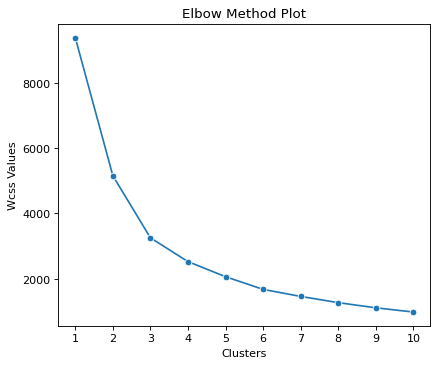

In [ ]:
wcss = []

for i in range(1,11):
  kmeans = KMeans(
      n_clusters = i,
      init = 'k-means++',
      random_state=42
  )
  kmeans.fit(pca_dataset)
  print('k = ', i, ' inertia : ', kmeans.inertia_)
  wcss.append([i, kmeans.inertia_]) # kmeans.inertia_ returns the calculated WCSS Values

wcss_dataframe = pd.DataFrame(wcss, columns=['clusters','wcss value'])

# Plot for Elbow Method 
plt.rcParams['figure.figsize'] = (6,5)
plt.rcParams['figure.dpi'] = 80
sns.lineplot(
    x = wcss_dataframe.clusters.values,
    y = wcss_dataframe['wcss value'], marker='o'
)
plt.xticks(np.arange(1,11))
plt.xlabel('Clusters')
plt.ylabel('Wcss Values')
plt.title('Elbow Method Plot')
plt.show()

Hampir sama seperti grafik sebelumnya, dapat dilihat jumlah cluster yang membentuk siku saat k=3, sedangkan pada jumlah cluster k=4 hingga seterusnya terlihat mulai stabil, maka ditetapkan siku terletak pada jumlah cluster 3.

<a id ="8"></a>
## KMEANS CLUSTERING

### KMeans Model with Feature Selection

Untuk penerapan model *clustering*, kelompok kami menggunakan metode KMeans dengan parameter jumlah *cluster* = *cluster* optimal yaitu 3, sesuai jumlah cluster yang didapat pada Elbow Method.

#### Model with Feature Selection Using Original Data

In [ ]:
# Penerapan model KMeans untuk meng-cluster dataset Adidas Vs Nike dengan fitur selection tanpa scaling
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=50)
y_kmeans = pd.Series(kmeans.fit_predict(feature))
y_kmeans

0       0
1       1
2       1
3       1
4       1
       ..
3009    2
3010    0
3011    1
3012    0
3013    0
Length: 3014, dtype: int32

In [ ]:
# Jumlah tiap cluster pada dataset Adidas Vs Nike
y_kmeans.value_counts()

1    1892
0     815
2     307
dtype: int64

Output di atas menunjukkan hasil clustering untuk masing-masing cluster yaitu 815 data yang termasuk ke dalam cluster 0, 1892 data termasuk ke dalam cluster 1, dan 307 data yang termasuk ke dalam cluster 2.

#### Model with Feature Selection Using Scaled Data

In [ ]:
# Penerapan model KMeans untuk meng-cluster dataset Adidas Vs Nike dengan fitur selection tanpa scaling
scaled_kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=50)
scaled_y_kmeans = pd.Series(scaled_kmeans.fit_predict(feature_s))
scaled_y_kmeans

0       1
1       0
2       0
3       0
4       0
       ..
3009    2
3010    1
3011    0
3012    1
3013    1
Length: 3014, dtype: int32

In [ ]:
scaled_y_kmeans.value_counts()

0    1894
1     824
2     296
dtype: int64

Output di atas menunjukkan hasil clustering untuk masing-masing cluster yaitu 1894 data yang termasuk ke dalam cluster 0, 824 data termasuk ke dalam cluster 1, dan 296 data yang termasuk ke dalam cluster 2.

### KMeans Model with Data Reduction

In [ ]:
# Penerapan model KMeans untuk meng-cluster dataset Adidas Vs Nike dengan data reduction
pca_kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=50)
pca_y_kmeans = pd.Series(pca_kmeans.fit_predict(feature_pca))
pca_y_kmeans

0       2
1       0
2       0
3       0
4       0
       ..
3009    1
3010    2
3011    1
3012    2
3013    1
Length: 3014, dtype: int32

In [ ]:
pca_y_kmeans.value_counts()

0    1732
2     723
1     559
dtype: int64

Output di atas menunjukkan hasil clustering untuk masing-masing cluster yaitu 1732 data yang termasuk ke dalam cluster 0, 559 data termasuk ke dalam cluster 1, dan 723 data yang termasuk ke dalam cluster 2.

<a id ="9"></a>
## CLUSTER VISUALIZATION

### Model with Feature Selection Using Original Data

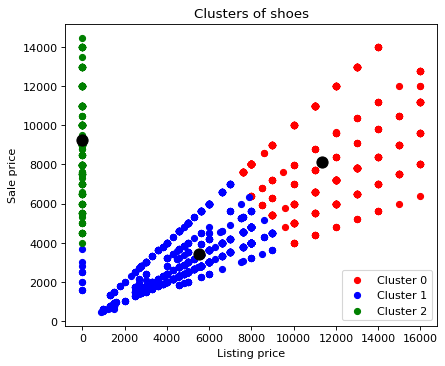

In [ ]:
# Visualizing all the clusters
plt.scatter(arr_dataset[y_kmeans==0,0], arr_dataset[y_kmeans==0,1], s=30, c='red', label='Cluster 0')
plt.scatter(arr_dataset[y_kmeans==1,0], arr_dataset[y_kmeans==1,1], s=30, c='blue', label='Cluster 1')
plt.scatter(arr_dataset[y_kmeans==2,0], arr_dataset[y_kmeans==2,1], s=30, c='green', label='Cluster 2')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 100, c = 'black')
plt.title('Clusters of shoes')
plt.xlabel('Listing price')
plt.ylabel('Sale price')
plt.legend()
plt.show()

### Model with Feature Selection Using Scaled Data

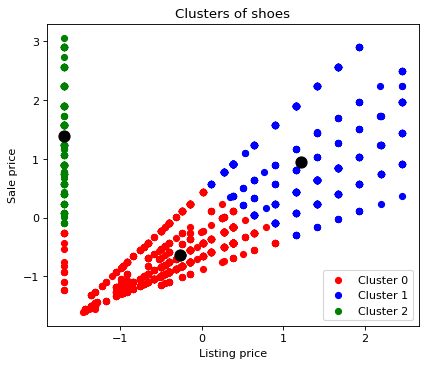

In [ ]:
# Visualizing all the clusters
plt.scatter(scaled_dataset[scaled_y_kmeans==0,0], scaled_dataset[scaled_y_kmeans==0,1], s=30, c='red', label='Cluster 0')
plt.scatter(scaled_dataset[scaled_y_kmeans==1,0], scaled_dataset[scaled_y_kmeans==1,1], s=30, c='blue', label='Cluster 1')
plt.scatter(scaled_dataset[scaled_y_kmeans==2,0], scaled_dataset[scaled_y_kmeans==2,1], s=30, c='green', label='Cluster 2')
plt.scatter(scaled_kmeans.cluster_centers_[:,0], scaled_kmeans.cluster_centers_[:,1], s = 100, c = 'black')
plt.title('Clusters of shoes')
plt.xlabel('Listing price')
plt.ylabel('Sale price')
plt.legend()
plt.show()

### Model with Data Reduction

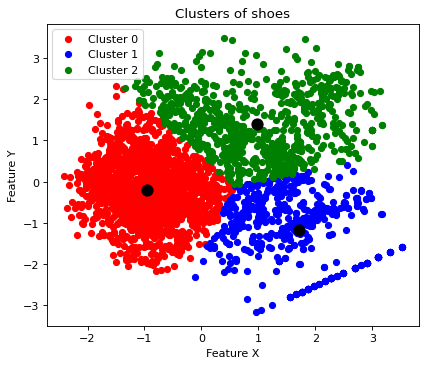

In [ ]:
# Visualizing all the clusters
plt.scatter(pca_dataset[pca_y_kmeans==0,0], pca_dataset[pca_y_kmeans==0,1], s=30, c='red', label='Cluster 0')
plt.scatter(pca_dataset[pca_y_kmeans==1,0], pca_dataset[pca_y_kmeans==1,1], s=30, c='blue', label='Cluster 1')
plt.scatter(pca_dataset[pca_y_kmeans==2,0], pca_dataset[pca_y_kmeans==2,1], s=30, c='green', label='Cluster 2')
plt.scatter(pca_kmeans.cluster_centers_[:,0], pca_kmeans.cluster_centers_[:,1], s = 100, c = 'black')
plt.title('Clusters of shoes')
plt.xlabel('Feature X')
plt.ylabel('Feature Y')
plt.legend()
plt.show()

<a id ="10"></a>
## EVALUATE MODEL

Untuk evaluasi model clustering, kelompok menggunakan *sillhouette score*. *Sillhouette score* merupakan jarak antara titik data ke titik data lain di *cluster* yang
sama dibandingkan dengan titik data di *cluster* tetangga terdekat.
Analisis siluet dapat digunakan untuk mempelajari jarak pemisahan
antara *cluster* yang dihasilkan. Plot siluet menampilkan ukuran
seberapa dekat setiap titik dalam satu *cluster* dengan titik-titik di
*cluster* tetangga dan dengan demikian menyediakan cara untuk
menilai parameter seperti jumlah *cluster* secara visual. Ukuran ini
memiliki rentang [-1, 1]. Koefisien siluet (sebagai nilai-nilai ini
disebut sebagai) dekat +1 menunjukkan bahwa sampel jauh dari
*cluster* tetangga. Nilai 0 menunjukkan bahwa sampel berada pada
atau sangat dekat dengan batas keputusan antara dua *cluster* tetangga
dan nilai negatif menunjukkan bahwa sampel tersebut mungkin telah
ditetapkan ke *cluster* yang salah.

In [ ]:
silhouette_score(feature, y_kmeans)

0.5600518785186818

In [ ]:
silhouette_score(feature_s, scaled_y_kmeans)

0.5686434532697444

In [ ]:
silhouette_score(feature_pca, pca_y_kmeans)

0.47352836040355295

## KESIMPULAN


Dari hasil analisis dan evaluasi model menggunakan silhouette score, dapat disimpulkan bahwa *clustering* menggunakan model KMeans untuk dataset sepatu Adidas vs Nike memberikan hasil terbaik menggunakan *scaled data* dengan *feature selection* Listing Price dan Sale Price.